In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../srujananagaraj"))

['Music', '.condarc', 'Untitled1.ipynb', 'result', '.DS_Store', 'VGG.ipynb', '.CFUserTextEncoding', 'nohup_copy.out', 'Untitled.ipynb', 'Imagenet32_train1', 'Logistic_dont_kaggle.ipynb', 'Pictures', 'test.csv', 'nvidia.txt', 'Untitled2.ipynb', '.ipython', 'Desktop', 'Library', '.matplotlib', 'ML_Overfit.ipynb', '.bash_profile.pysave', 'alex_working.zip', 'vgg_output.zip', '.bash_sessions', 'PycharmProjects', 'Public', 'Imagenet32_val', '.bash_profile-anaconda3.bak', '.idlerc', '.anaconda', '.ssh', 'Movies', 'Applications', '.Trash', 'train.csv', '.ipynb_checkpoints', '.jupyter', '.keras', 'test_y.csv', 'nohup_output.zip', 'Documents', '.bash_profile', 'Imagenet32_train1.zip', 'Downloads', '.bash_history', '.viminfo', 'sample_submission.csv', '.conda', 'sVM.ipynb']


In [2]:
train=pd.read_csv('../srujananagaraj/train.csv')
test=pd.read_csv('../srujananagaraj/test.csv')
train.shape, test.shape

((250, 302), (19750, 301))

In [3]:
# Preparing the data
X=train.drop(['id','target'],axis=1)
y=train['target']

In [4]:
X_test=test.drop(['id'],axis=1)

In [182]:
# Splitting the dataset in training and validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, shuffle = None, random_state = 0)

In [183]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_ = scaler.fit_transform(X_train)
val_= scaler.fit_transform(X_val)
test_ = scaler.transform(X_test)

In [184]:
# training logistic regression classifier

In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
best_score = 0
for penalty in ['l1', 'l2']:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:       
        logreg = LogisticRegression(class_weight='balanced',  penalty=penalty, C=C, solver='liblinear')
        logreg.fit(train_, y_train)
        score = logreg.score(val_, y_val)
        if score > best_score:
            best_score = score
            print (best_score)
            best_parameters = {'C': C, 'penalty': penalty} 

0.3492063492063492
0.7777777777777778
0.8095238095238095


In [186]:
logreg = LogisticRegression(**best_parameters)
logreg.fit(train_, y_train)
accuracy = logreg.score(val_, y_val)
accuracy

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7777777777777778

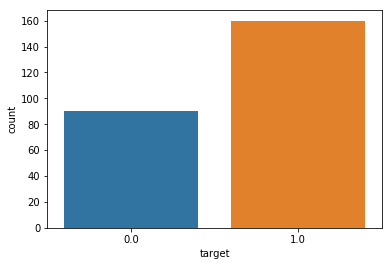

In [187]:
# Count the target
sns.countplot(train['target'])

In [188]:
# from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced', solver='liblinear', penalty ='l1', C= 0.1, max_iter=10000)
logreg.fit(train_, y_train)
test_score = logreg.score(val_, y_val)
test_score

0.7777777777777778